In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

print("Import complete")

### Change the Unknown to missing values

There are no nan values in the dataset. However I see that there are a lot of unknown values. I infer that missing values are Unknown instead of default NaN values of numpy

In [2]:
df = pd.read_csv("/home/srijan/Documents/drexel/datasets/kag_hom_ds.csv" , header = 0 , low_memory=False)

In [ ]:
df.columns

### How many missing values are there in the dataset:

In [ ]:
missing_values = df.isna().sum()
missing_values

In [ ]:
df.columns

In [ ]:
total_record = df["Record ID"].count()
print ("Total Records: %s" %(total_record))

### What dimentions can be outright removed based on the missing values? 


In [ ]:
frame = {"Missing Values": missing_values}
missing_value_df=pd.DataFrame(frame)
missing_value_df["Total Difference"] = total_record - missing_value_df["Missing Values"]
missing_value_df["Perc Remaining Value (%)"] = missing_value_df["Total Difference"]/total_record *100
missing_value_df


### Some Insights 
1. Perpetrator Ethnicity has only **30%** values 
1. Victim Ethnicity has only **42%** values 
1. Relationship has only **57%** values 

#### Best to get rid of these values as basing the model will require removing lot of values.

In [ ]:
to_drop = ["Perpetrator Ethnicity" , "Victim Ethnicity" , "Relationship" ]
df = df.drop(labels = to_drop , axis =1)
df.columns

# Conclusion 

1. There were no NaN missing values 
1. Dimensions with maximum number of missing values have been removed 



In [ ]:
df.to_csv(path_or_buf= "/home/srijan/Documents/cleenupcode")

In [ ]:
cdf["Victim Count"].groupb

In [ ]:
df.head()

### How does age range relate to solved vs. unsolved? (Srijan)

In [31]:
solved_vs_age = df.loc[:,["Crime Solved", "Victim Age"]]

In [32]:
solved_vs_age = solved_vs_age.sort_values(by="Victim Age" , axis=0, ascending=True , kind='quicksort')
# we need to clean the data 
# remove any age =0 and age > 100 out of the dataframe 
solved_vs_age.head()


,Crime Solved,Victim Age
638453,Yes,0
375163,Yes,0
375161,Yes,0
375125,Yes,0
375104,No,0


In [33]:
#new_df = old_df[((old_df['C1'] > 0) & (old_df['C1'] < 20)) & ((old_df['C2'] > 0) & (old_df['C2'] < 20)) & ((old_df['C3'] > 0) & (old_df['C3'] < 20))]
solve_crime_list = [] 
heading = [] 
unsolved_crime_list = [] 
for i in range(0,100, 10): 
    low_age = i
    high_age = i+10
    solve_crime = solved_vs_age[((solved_vs_age['Crime Solved']== 'Yes') & (solved_vs_age['Victim Age'] > low_age) & (solved_vs_age['Victim Age'] < high_age))]
    unsolved_crime = solved_vs_age[((solved_vs_age['Crime Solved']== 'No') & (solved_vs_age['Victim Age'] > low_age) & (solved_vs_age['Victim Age'] < high_age))]
    solve_crime_list.append(len(solve_crime["Crime Solved"]))
    unsolved_crime_list.append(len(unsolved_crime["Crime Solved"]))
    heading.append("%s %s " % (low_age , high_age))
    


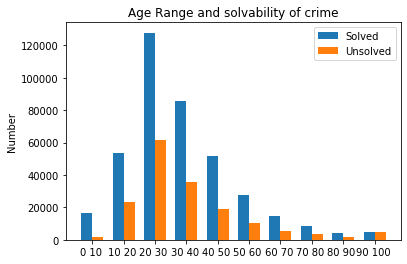

In [34]:
ind = np.arange(0, 10 )
width = 0.35       
plt.bar(ind, solve_crime_list, width, label='Solved')
plt.bar(ind + width, unsolved_crime_list, width,
    label='Unsolved')

plt.ylabel('Number')
plt.title('Age Range and solvability of crime')

plt.xticks(ind + width / 2, tuple(heading))
plt.legend(loc='best')
plt.show()

## To do, need to see that age above 100 data is removed 

# Correlation of Month and Solvability of case 

In [14]:
month_df = df.loc[:,['Crime Solved' , 'Month']]
months = ["January" , "February" , "March" , "April", "May" , "June", "July", "August", "September", "October" , "November", "December"]
print(month_df["Month"].unique())
month_solved_list = []
month_unsolved_list = [] 

for i in range (0, 12):
    month_solved = month_df[((month_df["Crime Solved"] == 'Yes') & (month_df["Month"] == months[i]))]
    month_unsolved = month_df[((month_df["Crime Solved"] == 'No') & (month_df["Month"] == months[i]))]
    month_solved_list.append(len(month_solved["Crime Solved"]))
    month_unsolved_list.append(len(month_unsolved["Crime Solved"]))

print(month_solved_list)
print(month_unsolved_list)
print(months)



['January' 'March' 'April' 'May' 'June' 'July' 'August' 'December'
 'November' 'February' 'October' 'September']
[37951, 33258, 36640, 36613, 37851, 37817, 41468, 40805, 37804, 36896, 33840, 37229]
[14977, 12821, 14804, 14596, 15543, 15845, 17228, 17267, 16313, 16754, 16176, 17958]
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


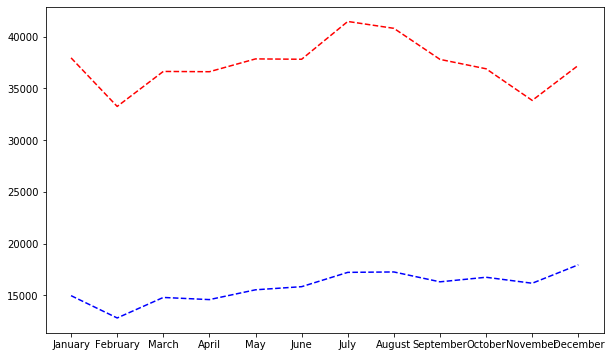

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(months , month_solved_list , 'r--' ,
        months , month_unsolved_list , 'b--' )
plt.show()


# Correlation of Agency related to solvability of crime 


In [4]:
agency_df = df.loc[:, ["Agency Name" , "Crime Solved"]]
agency_df.head()


,Agency Name,Crime Solved
0,Anchorage,Yes
1,Anchorage,Yes
2,Anchorage,No
3,Anchorage,Yes
4,Anchorage,No


In [35]:
list_of_agencies= agency_df["Agency Name"].unique()
agencies_solved_list = []
agencies_unsolved_list = []

for i in list_of_agencies:
    print(i)
     
        

Anchorage
Juneau
Nome
Bethel
North Slope Borough
Kenai
Alaska State Police
Jefferson
Bessemer
Birmingham
Fairfield
Gardendale
Leeds
Homewood
Brighton
Hueytown
Warrior
Mobile
Prichard
Chickasaw
Saraland
Satsuma
Montgomery
Autauga
Baldwin
Robertsdale
Daphne
Barbour
Blount
Bullock
Butler
Greenville
Calhoun
Anniston
Oxford
Chambers
Lafayette
Chilton
Choctaw
Clarke
Thomasville
Cleburne
Enterprise
Colbert
Tuscumbia
Conecuh
Coosa
Rockford
Andalusia
Crenshaw
Cullman
Dale
Ozark
Dallas
Selma
Collinsville
Elmore
Tallassee
Atmore
Brewton
Attalla
Gadsden
Fayette
Franklin
Red Bay
Geneva
Greene
Houston
Dothan
Jackson
Scottsboro
Lamar
Lauderdale
Florence
Lawrence
Lee
Auburn
Opelika
Limestone
Athens
Lowndes
Tuskegee
Madison
Huntsville
New Hope
Owens Crossroads
Marengo
Hackleburg
Marshall
Albertville
Morgan
Decatur
Hartselle
Perry
Marion
Pickens
Troy
Russell
Phenix City
St. Clair
Springville
Shelby
Montevallo
Alabaster
Sumter
Livingston
Talladega
Tallapoosa
Alexander City
Tuscaloosa
Northport
Jasper
Was

Winona
Wright
Bates
Bollinger
Poplar Bluff
Camden
Cape Girardeau
Belton
Claycomo
Republic
Iron
Blue Springs
Grandview
Raytown
Sugar Creek
Joplin
Arnold
Warrensburg
Laclede
Odessa
Mcdonald
Maries
Pemiscot
Rolla
Louisiana
Platte
St. Robert
Ray
St. Francois
St. Louis County
Bellefontaine Neighbors
Bridgeton
Des Peres
Ellisville
Ferguson
Hanley Hills
Jennings
Normandy
Overland
Rock Hill
University City
Vinita Park
Wellston
Sikeston
Texas
Natchez
Corinth
Bolivar
Cleveland
Clarksdale
Copiah
Hazlehurst
Hattiesburg
Biloxi
Hinds
Moss Point
Pascagoula
East Mississippi Junior College
Tupelo
Brookhaven
Ridgeland
Aberdeen
Starkville
Booneville
Scott
Sunflower
Tate
Leland
Hollandale
Yalobusha
Yazoo City
Big Horn
Carbon
Miles City
Glendive
Lewis and Clark
Missoula
Rosebud
Butte-Silver Bow
Teton
Yellowstone
Billings
Buffalo
Kearney
Omaha
Gage
Grand Island
North Platte
Norfolk
Nebraska City
Scottsbluff
Gering
Valley
Alamance
Mebane
Alexander
Anson
Avery
Beaufort
Belhaven
Bertie
Bladen
Bladenboro
Buncom

Sagadahoc
Kittery
Old Orchard Beach
South Berwick
Alcona
Barry
Berrien Springs-Oronoko
St. Joseph Township
State Police: Calhoun County
Bedford Township
Cheboygan
Dewitt Township
State Police: Dickinson County
Grand Ledge
Fenton
Genesee Township
Swartz Creek
East Lansing
Lansing Township
Ionia
Oscoda Township
Isabella
Leoni Township
Napoleon Township
State Police: Lapeer County
State Police: Luce County
State Police: Mackinac County
St. Ignace
State Police: Macomb County
Fraser
Shelby Township
State Police: Marquette County
Ishpeming Township
State Police: Menominee County
Montcalm
North Muskegon
State Police: Newaygo County
Walled Lake
Waterford Township
White Lake Township
State Police: Ogemaw County
Chesaning
Sturgis
Three Rivers
Owosso
Grosse Pointe Woods
Melvindale
Cadillac
Centennial Lakes
Columbia Heights
New Ulm
Dilworth
Burnsville
Fillmore
St. Louis Park
Minnetrista
Spring Park
Itasca
Lake of The Woods
Le Sueur
Mcleod
Morrison
North Mankato
East Grand Forks
Mounds View
Rice
Ba

Manlius Town
New Windsor Town
Phoenix Village
Piermont Village
Scotia Village
Niskayuna Town
Fallsburg Town
Hastings-On-Hudson Villa
Pelham Village
Mamaroneck Town
State Police: Delaware County (C)
State Police: Genesee County (A)
State Police: Montgomery County (G)
State Police: Orleans County (A)
State Police: Seneca County (E)
Goshen Township
Bucyrus
Bay Village
Brecksville
Richmond Heights
Westerville
Worthington
Golf Manor
North Ridgeville
Mahoning
Beaver Township
Vandalia
Port Clinton
Alliance
Tuscarawas
Northwood
Watonga
Canadian
Coalgate
Crescent
Mcclain
Jenks
Woods
Philomath
Clatsop
Gearhart
State Police: Douglas County
Harney
Madras
Gresham
Port of Portland
Troutdale
Gettysburg
Bridgeville
Etna
Rankin
North Coventry Township
Tredyffrin Township
East Pikeland Township
Meadville
Lower Allen Township
Mount Holly Springs
Steelton
Williamstown
Morton
Connellsville
Masontown
Waynesburg
Dunmore
Throop
South Abington Township
North Londonderry Township
Plains Township
State Police: M

Pflugerville
Piute
State Police: Powhatan County
Virginia State Capitol
Asotin
Fife
Edmonds
Lynden
Shorewood
Department of Natural Resources: Putnam County
Tyler State Police
Mullens
Baggs
Powell
Soldotna
Star City
Des Arc
De Valls Bluff
Cottonwood
Diamond Bar
San Marino
California State University: Northridge
Sausalito
Department of Parks and Recreation: Orange Coast
Laguna Niguel
Rocklin
Norco
Palm Desert
Moreno Valley
Department of Parks and Recreation: Colorado
Rifle
Crested Butte
Log Lane Village
San Miguel
Pearson
Eastman
Hephzibah
Donalsonville
Telfair
Twiggs
Spirit Lake
De Pue
Wood Dale
Royalton
Libertyville
Algonquin
Illinois State University
Bethalto
Bartonville
State Police: Tipton County
Goodland
Neodesha
Cave City
Vine Grove
Riverdale Park
Msp Statewide
Wiscasset
Wayland
Eaton Rapids
State Police: Gogebic County
State Police: Grand Traverse County
Imlay City
Lathrup Village
Wolverine Lake
Wexford
Cloquet
West St. Paul
Freeborn
Elk River
Owatonna
Traverse
Plattsmouth
Gothen

Neshannock Township
Foster Township
Orwigsburg
Sullivans Island
Cumberland Gap
Decaturville
Church Hill
Selmer
Sullivan City
Oakesdale
Dodgeville
Everest
Kewaskum
Oconomowoc
Shepherd University
State Police: Quincy
State Police: Glenville
State Police: Winfield
Loxley
Ragland
Double Springs
Department of Parks and Recreation: Monterey County
California State University: Monterey Bay
American Canyon
Department of Parks and Recreation: Gold Fields District
Delaware State University
Marco Island
Sandy Spring
Snellville
Suwanee
Shelley
Louisiana State University: Baton Roug
Broussard
Monson
Edmonston
Delmar
Bad Axe
Howard City
Constantine
Mattawan
Raymore
Nixa
Gower
Lilbourn
Marston
Bella Villa
State Police: Lee's Summit
State Police: Macon
State Police: Poplar Bluff
Boscawen
Quay
Moriarty
Menands Village
Frankfort Town
Goshen Village
Highlands Town
Nelsonville
Pickerington
Groveport
Achille
Kutztown
Laureldale
Adams Township
Pequea Township
Colonial Regional
Schuylkill County Detective Bu